In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 5.2 MB/s 
     |████████████████████████████████| 19.2 MB 45.7 MB/s 
     |████████████████████████████████| 240 kB 38.8 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 112 kB 65.6 MB/s 
     |████████████████████████████████| 943 kB 52.9 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 1.6 MB 36.4 MB/s 
     |████████████████████████████████| 37.5 MB 48 kB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 4.0 MB 42.0 MB/s 
     |████████████████████████████████| 112 kB 48.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.38.0-py3-none-any.whl size=12147 sha256=66209520ae385a1669df5bd33ec902401ed97ad013bf6eb7cdb271f7031044c3
  Stored in directory: /root/.cache/pip/wheels/0b/30/78/04c91

In [ ]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

#Full adder circuit
q = QuantumRegister(5, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

#setting input and Carry in
circuit.x(q[1])
circuit.x(q[2])
circuit.barrier(q[0], q[1], q[2], q[3], q[4])

#setting Carry out
circuit.ccx(q[0], q[1], q[3])
circuit.ccx(q[2], q[1], q[3])
circuit.ccx(q[0], q[2], q[3])
circuit.barrier(q[0], q[1], q[2], q[3], q[4])

#setting sum
circuit.cx(q[0], q[4])
circuit.cx(q[1], q[4])
circuit.cx(q[2], q[4])
circuit.barrier(q[0], q[1], q[2], q[3], q[4])

#measuring sum and Carry out
circuit.measure(q[3], c[1])
circuit.measure(q[4], c[0])

circuit.draw()

░                 ░                 ░       
q_0: ──────░───■─────────■───░───■─────────────░───────
     ┌───┐ ░   │         │   ░   │             ░       
q_1: ┤ X ├─░───■────■────┼───░───┼────■────────░───────
     ├───┤ ░   │    │    │   ░   │    │        ░       
q_2: ┤ X ├─░───┼────■────■───░───┼────┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░   │    │    │   ░ ┌─┐   
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░───┼────┼────┼───░─┤M├───
           ░ └───┘└───┘└───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └╥┘┌─┐
q_4: ──────░─────────────────░─┤ X ├┤ X ├┤ X ├─░──╫─┤M├
           ░                 ░ └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════════╩══╩═
                                                  1  0

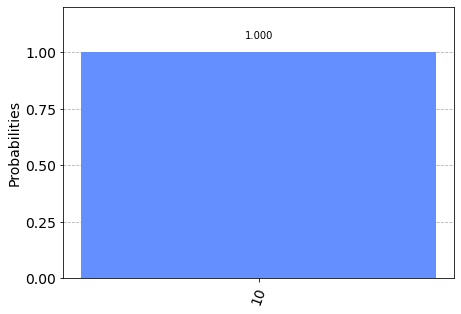

In [ ]:
aer_sim=Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)